In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
import pandas as pd
import numpy as np
import time


sns.set_style("white")

In [41]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('../src/out/'):
    
    for name in files:
        if fnmatch(name, pattern):
            if 'spurious_linear_l11' in name:
                # rename the file
                os.rename(os.path.join(path, name), os.path.join(path, name.replace('spurious_linear_l11', 'spurious_linear_l1_1')))
                print('renamed')

../src/out/spurious_linear_l11719284510016680.csv
renamed
../src/out/spurious_linear_l11719279176973544.csv
renamed
../src/out/spurious_linear_l11719280504631938.csv
renamed
../src/out/spurious_linear_l11719283726185002.csv
renamed
../src/out/spurious_linear_l11719278611374313.csv
renamed
../src/out/spurious_linear_l11719281081644821.csv
renamed
../src/out/spurious_linear_l11719278989448885.csv
renamed
../src/out/spurious_linear_l11719278487501799.csv
renamed
../src/out/spurious_linear_l11719281725706154.csv
renamed
../src/out/spurious_linear_l11719284697233252.csv
renamed
../src/out/spurious_linear_l11719281361472561.csv
renamed
../src/out/spurious_linear_l11719285107871956.csv
renamed
../src/out/spurious_linear_l11719285037641383.csv
renamed
../src/out/spurious_linear_l11719282230951123.csv
renamed
../src/out/spurious_linear_l11719279641144257.csv
renamed
../src/out/spurious_linear_l11719283155246213.csv
renamed
../src/out/spurious_linear_l11719280433801953.csv
renamed
../src/out/spu

In [47]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('../src/out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    df_concat = pd.concat(dataframes)
    df_concat.to_csv('linear_synthetic_agg_'+str(int(time.time()*1e6))+'.csv')


In [48]:
dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    df_concat = pd.concat(dataframes)
    df_concat.to_csv('linear_synthetic_agg_'+str(int(time.time()*1e6))+'.csv')

In [50]:
df_concat_l2 = pd.read_csv("linear_synthetic_agg_1630302542600186.csv")

linres = df_concat
linres_l2 = df_concat_l2
# print(list(linres.columns))

subres_testct =  linres[[
'causalrep_testctaccs_0.1', \
'naive_testct_lintestacc', \
'oracle_testct_lintestacc', \
'spurious_corr']]

subres_testobs =  linres[['causalrep_testobsaccs_0.01', \
'naive_testobs_lintestacc', \
'oracle_testobs_lintestacc', \
'spurious_corr']]



# plot diagonal line
def plot_unity(xdata, ydata, **kwargs):
    mn = min(xdata.min(), ydata.min())
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

In [51]:
subres_testct_l2 =  linres_l2[[
'causalrep_testctaccs_0.1', \
'naive_testct_lintestacc', \
'oracle_testct_lintestacc', \
'spurious_corr']]

subres_testobs_l2 =  linres_l2[['causalrep_testobsaccs_0.01', \
'naive_testobs_lintestacc', \
'oracle_testobs_lintestacc', \
'spurious_corr']]

In [52]:
# linres = df_concat[(df_concat['neg_corr']==1) & (df_concat['pm_coef']==1)]

In [77]:
linres_1_1 = linres[[
'causalrep_testctaccs_0.0001', \
'naive_testct_lintestacc', \
'oracle_testct_lintestacc']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})

In [78]:
linres_1_1_l2 = linres_l2[[
'causalrep_testctaccs_0.0001', \
'naive_testct_lintestacc', \
'oracle_testct_lintestacc']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})

In [79]:
# Rename the 'causalrep' method in both dataframes
linres_1_1 = linres_1_1.reset_index()
linres_1_1['method'] = linres_1_1['method'].replace('causalrep_testctaccs_0.0001', 'causalrep_testctaccs_0.0001_l1')

linres_1_1_l2 = linres_1_1_l2.reset_index()
linres_1_1_l2['method'] = linres_1_1_l2['method'].replace('causalrep_testctaccs_0.0001', 'causalrep_testctaccs_0.0001_l2')

# Concatenate the two dataframes
merged_linres = pd.concat([linres_1_1, linres_1_1_l2])

# Reset index for the final dataframe
merged_linres = merged_linres.set_index('level_0')

# Optional: Sort the dataframe by the original index and method
merged_linres = merged_linres.sort_values(by=['level_0', 'method'])


print(merged_linres)

                                 method       acc
level_0                                          
0        causalrep_testctaccs_0.0001_l1  0.693089
0        causalrep_testctaccs_0.0001_l1  0.576595
0        causalrep_testctaccs_0.0001_l1  0.693008
0        causalrep_testctaccs_0.0001_l1  0.592959
0        causalrep_testctaccs_0.0001_l1  0.811043
...                                 ...       ...
98              naive_testct_lintestacc  0.513550
98             oracle_testct_lintestacc  0.821564
99       causalrep_testctaccs_0.0001_l2  0.468455
99              naive_testct_lintestacc  0.512205
99             oracle_testct_lintestacc  0.804741

[600 rows x 2 columns]


In [85]:
new_labels = {
    'causalrep_testctaccs_0.0001_l1': 'CAUSAL-REP \nL1',
    'causalrep_testctaccs_0.0001_l2': 'CAUSAL-REP \nL2',
    'naive_testct_lintestacc': 'Linear \nregression',
    'oracle_testct_lintestacc': 'Oracle'
}

/var/folders/h3/mg_n_0ls7kgb1369wvkmb_dh0000gq/T/ipykernel_45088/4230656691.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels([new_labels[label.get_text()] for label in g.get_xticklabels()])


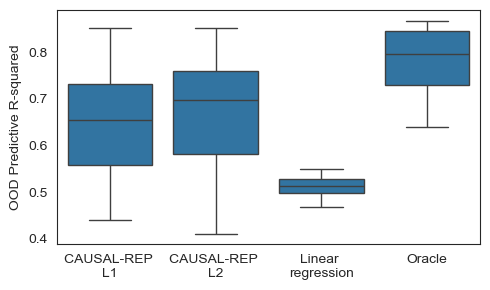

In [86]:
plt.figure(figsize=(5,3))
g = sns.boxplot(x="method", y="acc", data=merged_linres)
# g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])
g.set_xticklabels([new_labels[label.get_text()] for label in g.get_xticklabels()])
# g.set(ylim=(-1,1))
g.set(xlabel='')
g.set(ylabel='OOD Predictive R-squared')
plt.tight_layout()
plt.savefig('linear_synthetic_boxplot_l2.pdf')

/var/folders/h3/mg_n_0ls7kgb1369wvkmb_dh0000gq/T/ipykernel_45088/2652780944.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])


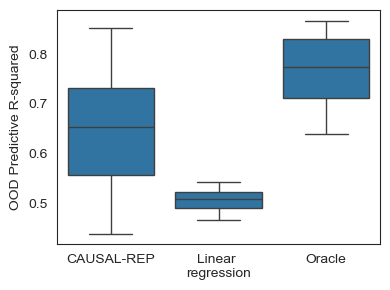

In [84]:
plt.figure(figsize=(4,3))
g = sns.boxplot(x="method", y="acc", data=linres_1_1)
g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])
# g.set(ylim=(-1,1))
g.set(xlabel='')
g.set(ylabel='OOD Predictive R-squared')
plt.tight_layout()
plt.savefig('linear_synthetic_boxplot.pdf')

In [71]:
merged_linres

,method,acc
level_0,,
0,causalrep__testctaccs_0.0001_l2,0.844984
0,causalrep_testctaccs_0.0001_l1,0.693089
0,causalrep_testctaccs_0.0001_l1,0.576595
0,causalrep_testctaccs_0.0001_l1,0.693008
0,causalrep_testctaccs_0.0001_l1,0.592959
...,...,...
98,naive_testct_lintestacc,0.513550
98,oracle_testct_lintestacc,0.821564
99,causalrep__testctaccs_0.0001_l2,0.468455


/Users/yuenc2/anaconda3/envs/gender/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/h3/mg_n_0ls7kgb1369wvkmb_dh0000gq/T/ipykernel_45088/964642295.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])
/Users/yuenc2/anaconda3/envs/gender/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yuenc2/anaconda3/envs/gender/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, 

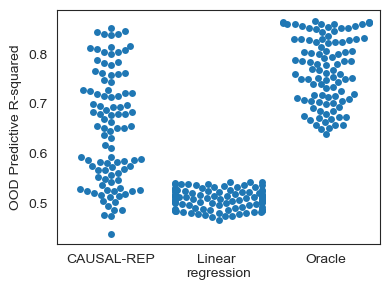

In [69]:
plt.figure(figsize=(4,3))
g = sns.swarmplot(x="method", y="acc", data=linres_1_1)
g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])
g.set(xlabel='')
g.set(ylabel='OOD Predictive R-squared')
plt.tight_layout()
plt.savefig('linear_synthetic_swarmplot_l2.pdf')